# Assignment 7 - Computer Applications in Physics
**Yu Jiawei (586067) Humblodt-Universität zu Berlin**

Solving a system of linear equations using LU-decomposition, so as to determine the frequency spectrum of a discrete input signal.

In [1]:
# Some packages
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as mpl

## The Signal
Here is the amplitute function for the sound wave of a simple A-major chord at its origin,

$$ f(t) = \cos(2\pi f_A t) + \cos(2\pi f_{C\#} t) + \cos(2\pi f_{E'} t) + \cos(2\pi f_{A'} t)$$

whose frequency components will be ascertained by solving a system of linear equations.

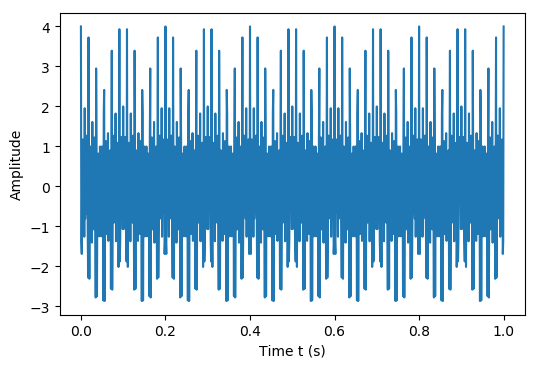

In [2]:
# Define a A-major chord (A-Dur-Akkord)
t = np.linspace(0,1,1001) # Time
f1 = 220 # A
f2 = 275 # C-sharp minor' (cis)
f3 = 330 # E'
f4 = 440 # A'

# The Signal
signal = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t) \
        + np.cos(2*np.pi*f3*t) + np.cos(2*np.pi*f4*t)

# It looks like this
Signal_plot = mpl.figure(dpi=100)
mpl.plot(t,signal)
mpl.xlabel('Time t (s)')
mpl.ylabel('Amplitude')
mpl.show()

## Part 1
In an effort to determine the spectrum of frequency without conducting any Fourier Transformations, a 1001 by 1001 matrix $A\in M_{1001}(\mathcal{H})$ is to be constructed that contains $1001\times1001$ consin-functions of different frequencies (from $f_0$ to $f_n$) regarding its columns and at different time (from $t_0$ to $t_n$) regarding its rows. Therefore the discrete signal $f(t)$ can be written as a linear combination of the columns of $A$.

$$
\begin{bmatrix}
    \cos(2\pi f_0 t_0) & \cos(2\pi f_1 t_0) & \dots & \cos(2\pi f_n t_0) \\
    \cos(2\pi f_0 t_1) & \cos(2\pi f_1 t_1) & \dots & \cos(2\pi f_n t_1) \\
    \vdots & \vdots & \ddots & \vdots \\
    \cos(2\pi f_0 t_n) & \cos(2\pi f_1 t_0) & \dots & \cos(2\pi f_n t_n)
\end{bmatrix} 
\begin{bmatrix}
    a_0 \\
    a_1 \\
    \vdots \\
    a_n
\end{bmatrix} = 
\begin{bmatrix}
    f(t_0) \\
    f(t_1) \\
    \vdots \\
    f(t_n)
\end{bmatrix}
$$

Note that the coefficients $a_k$ represent exactly the frequency components and we obtain them by just solving this system of linear equations $Ax=b$ with the help of a built-in solver `scipy.linalg.solve` from scipy.

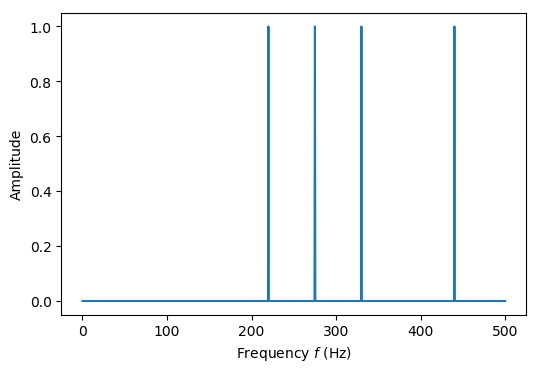

In [90]:
# Establish the 1001x1001 Matrix A
A = np.zeros((1001,1001))
for i in np.arange(1001):
    A[:,i] = np.cos(2*np.pi*i*0.5*t)

# Solve Ax=b
x = scipy.linalg.solve(A,signal)

# Plot the spectrum of frequency
f_range = np.linspace(0,500,1001)

Freq_spectrum = mpl.figure(dpi=100)
mpl.plot(f_range,x)
mpl.xlabel('Frequency $f$ (Hz)')
mpl.ylabel('Amplitude')
mpl.show()

## Part 2
Now we solve the equation $Ax=b$ using LU-decomposition `scipy.linalg.lu` of $A$.

Substitute $A$ by $PLU$ so the equation becomes $PLUx=b$. Let $Ux=y$ and our task now is to solve the new equation

$$ PLy=b \quad \textrm{or} \quad Ly=P^{-1}b$$

to get $y$ and consequently

$$ Ux=y $$

to get $x$

In [91]:
# LU-decomposition
(P, L, U) = scipy.linalg.lu(A)

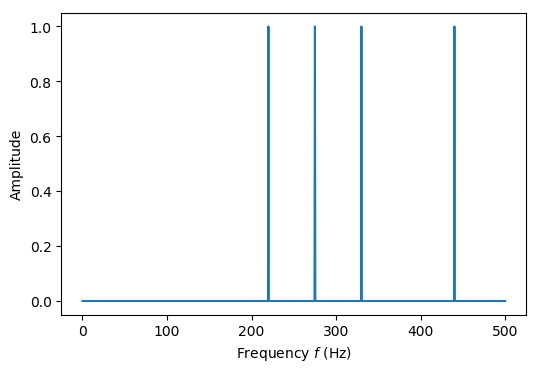

In [92]:
b = np.matmul(scipy.linalg.pinv(P), signal)

x2 = solve_LU(L, U, b)

Freq_spectrum = mpl.figure(dpi=100)
mpl.plot(f_range,x2)
mpl.xlabel('Frequency $f$ (Hz)')
mpl.ylabel('Amplitude')
mpl.show()

In [82]:
def forward_subs(L,b):
    # Preparing x
    n = np.size(b)
    x = np.zeros(n)
    
    for i in np.arange(n):
        x[i] = (b[i] - np.inner(L[i,:n-2],x[:n-2])) / L[i,i]
    
    return x

In [71]:
def backward_subs(U,b):
    # Preparing x
    n = np.size(b)
    x = np.zeros(n)
    
    for i in np.arange(n)[::-1]:
        x[i] = (b[i] - np.inner(U[i,:2:-1],x[:2:-1])) / U[i,i]
    
    return x

In [88]:
# Solve the equation using forward and backward substitution
def solve_LU(L, U, b):
    
    y = forward_subs(L,b)
    x = backward_subs(U,y)
    
    return x